In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\ML Datasets\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.shape

(2111, 17)

In [6]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
# setting features and target
x = data.drop(columns="NObeyesdad")
y = data["NObeyesdad"]

In [8]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
print("Train Size :",x_train.shape,y_train.shape)
print("Test Size",x_test.shape,y_test.shape)

Train Size : (1477, 16) (1477,)
Test Size (634, 16) (634,)


In [9]:
# seperating numerical and categorical features
num_feature = []
cat_feature = []

for i in data.columns:
    if data[i].dtypes != "object":
        num_feature.append(i)
    elif i == "NObeyesdad":
        continue
    else:
        cat_feature.append(i)

print("Numerical Feature :", num_feature)
print("Categorical Feature :", cat_feature)

Numerical Feature : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Feature : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [10]:
# forming numerical and categorical pipeline
num_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

In [11]:
# transforming data using column transformer
preprocessor = ColumnTransformer(transformers=[
    ("num",num_transformer,num_feature),
    ("cat",cat_transformer,cat_feature)
])

In [26]:
# creating baseline model
base_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("logestic",LogisticRegression())
])

In [28]:
base_model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('logestic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
# predict
y_pred = base_model.predict(x_test)

In [16]:
# evaluate model
acc = accuracy_score(y_test,y_pred)
print("Model Evaluation :")
print(f"Accuracy Score : {acc:.4f}")
print("\nClassification Report :\n")
print(classification_report(y_test,y_pred))

Model Evaluation :
Accuracy Score : 0.8659

Classification Report :

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        82
      Normal_Weight       0.80      0.77      0.79        86
     Obesity_Type_I       0.87      0.84      0.86       106
    Obesity_Type_II       0.91      0.97      0.94        89
   Obesity_Type_III       0.99      0.99      0.99        97
 Overweight_Level_I       0.74      0.75      0.74        87
Overweight_Level_II       0.78      0.75      0.76        87

           accuracy                           0.87       634
          macro avg       0.86      0.87      0.86       634
       weighted avg       0.86      0.87      0.86       634



In [17]:
# model hypertuning 
param_grid = {
    "logestic__C" : [0.01,0.1,1,5,10,25,75],
    "logestic__penalty" : [None,"l1","l2"],
    "logestic__l1_ratio" : [0,0.5,1],
    "logestic__solver" : ["newton-cg","liblinear","saga"]
}
grid = GridSearchCV(model,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error",n_jobs=1,verbose=2)
grid.fit(x_train,y_train)
print("Best Parameter :", grid.best_params_)
print("Best Score :", grid.best_score_)

Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=newton-cg; total time=   0.2s
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=newton-cg; total time=   0.1s
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=newton-cg; total time=   0.1s
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=newton-cg; total time=   0.1s
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=newton-cg; total time=   0.2s
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=liblinear; total time=   0.0s
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=liblinear; total time=   0.0s
[CV] END logestic__C=0.01, logestic__l1_ratio=0, logestic__penalty=None, logestic__solver=libline

In [18]:
# evaluate best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(x_test)
acc = accuracy_score(y_test,y_pred_best)
print(f"Accuracy Score : {acc:.4f}")
print("\n Classification Report :\n",classification_report(y_test,y_pred_best))

Accuracy Score : 0.9495

 Classification Report :
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      0.99      0.99        82
      Normal_Weight       0.91      0.95      0.93        86
     Obesity_Type_I       0.98      0.91      0.94       106
    Obesity_Type_II       0.97      1.00      0.98        89
   Obesity_Type_III       0.99      0.99      0.99        97
 Overweight_Level_I       0.92      0.89      0.90        87
Overweight_Level_II       0.89      0.93      0.91        87

           accuracy                           0.95       634
          macro avg       0.95      0.95      0.95       634
       weighted avg       0.95      0.95      0.95       634



In [19]:
# new data
df = pd.DataFrame([{
    "Gender" : "Female",
    "Age" : 23.664709,
    "Height" : 1.752206,
    "Weight" : 56.000000,
    "family_history_with_overweight" : "no",
    "FAVC" : "yes",
    "FCVC" : 2.0, 
    "NCP" : 3.0,
    "CAEC" : "Sometimes",
    "SMOKE" : "yes",
    "CH2O" : 1.728139,
    "SCC" : "yes",
    "FAF" : 2.000000,
    "TUE" : 1.000000,
    "CALC" : "Sometimes",
    "MTRANS" : "Public_Transportation",
}])

prediction = best_model.predict(df)
print("Obesity Class :", prediction[0])

Obesity Class : Normal_Weight


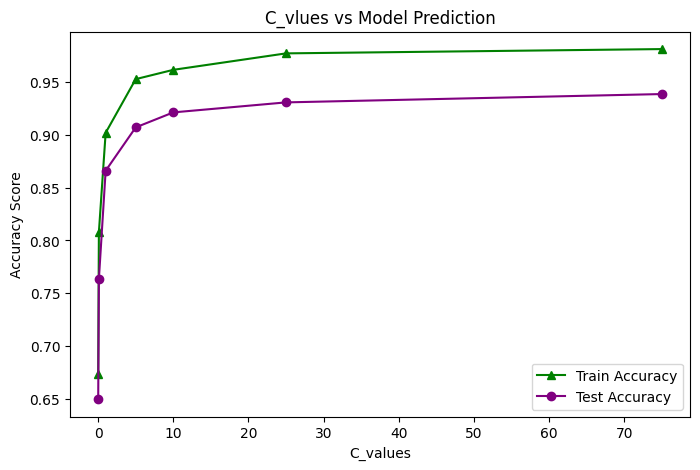

In [32]:
# graph C vs model prediction
c = [0.01,0.1,1,5,10,25,75]
train_acc = []
test_acc = []

for i in c:
    # creating model
    model = Pipeline(steps=[
        ("preprocessor",preprocessor),
        ("log_model",LogisticRegression(C=i))
    ])
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    train_a = accuracy_score(y_train,train_pred)
    test_a = accuracy_score(y_test,test_pred)
    train_acc.append(train_a)
    test_acc.append(test_a)

plt.figure(figsize=(8,5))
plt.plot(c,train_acc,marker="^",color="green",label="Train Accuracy")
plt.plot(c,test_acc,marker="o",color="purple",label="Test Accuracy")
plt.xlabel("C_values")
plt.ylabel("Accuracy Score")
plt.title("C_vlues vs Model Prediction")
plt.legend()
plt.show()